## Importing the dependences

In [1]:
import numpy as np , pandas as pd , seaborn as sns , matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Collection  

In [2]:
G_A = pd.read_csv('Admission_Predict.csv')

In [3]:
G_A.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
G_A.shape

(400, 9)

In [5]:
G_A.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### _we don't need serial number column_

In [6]:
G_A = G_A.drop(['Serial No.'],axis=1)

In [7]:
G_A.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
G_A.shape

(400, 8)

In [9]:
G_A.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
G_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [11]:
G_A.columns=G_A.columns.str.replace(" ","_")

In [12]:
G_A.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR_', 'CGPA',
       'Research', 'Chance_of_Admit_'],
      dtype='object')

In [13]:
G_A.value_counts().to_frame()

count
GRE_Score TOEFL_Score University_Rating SOP LOR_ CGPA Research Chance_of_Admit_       
290       100         1                 1.5 2.0  7.56 0        0.47                  1
322       115         5                 4.0 4.5  9.36 1        0.92                  1
323       113         4                 4.0 4.5  9.23 1        0.89                  1
                      3                 4.0 4.0  8.88 1        0.79                  1
                                            3.0  9.32 1        0.85                  1
...                                                                                ...
312       101         2                 2.5 3.5  8.04 1        0.68                  1
          100         2                 1.5 3.5  7.90 1        0.56                  1
          99          1                 1.0 1.5  8.01 1        0.52                  1
          98          1                 3.5 3.0  8.18 1        0.64                  1
340       120         5                 4.5 4.5  9.91 1        0.97                  1

[400 rows x 1 columns]

In [14]:
G_A.nunique().sort_values(ascending=False)

CGPA                 168
Chance_of_Admit_      60
GRE_Score             49
TOEFL_Score           29
SOP                    9
LOR_                   9
University_Rating      5
Research               2
dtype: int64

* CGPA: Cumulative Grade Point Average
* Chance of Admit: The estimated probability that the applicant will be admitted to the graduate program
* GRE Score: The Graduate Record Examination 
* TOEFL Score: The Test of English as a Foreign Language
* SOP: Statement of Purpose
* LOR: Letter of Recommendation
* University Rating: Rating of the university where the applicant wishes to gain admission
* Research: A binary variable (0 or 1) indicating whether the applicant has previous research experience

## Data Visualization 

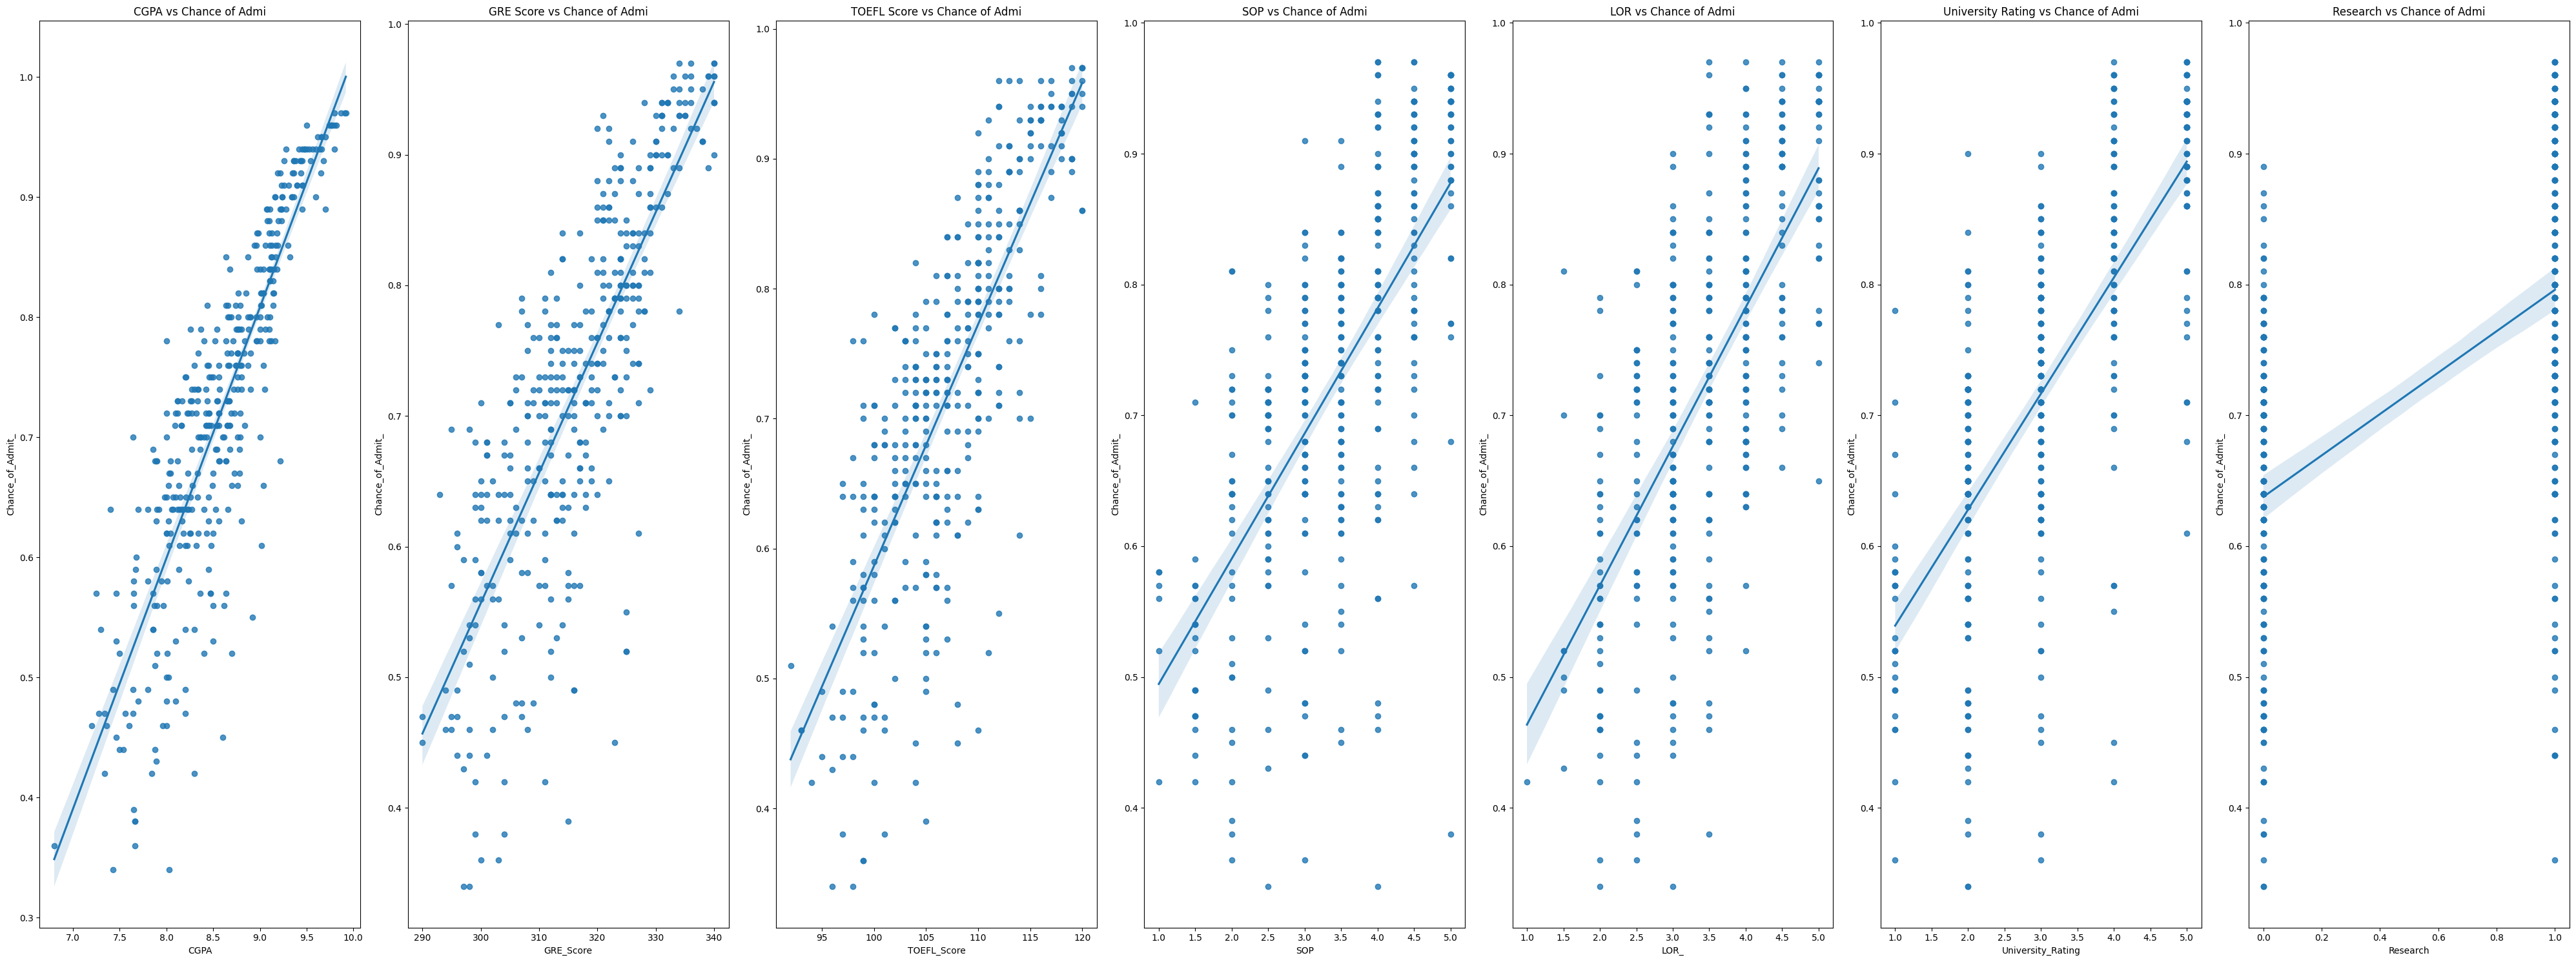

In [15]:
# regplot between chance of admition and the other variables
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(40,15))

sns.regplot(x='CGPA', y='Chance_of_Admit_', data=G_A, ax=axes[0])
axes[0].set_title('CGPA vs Chance of Admi')

sns.regplot(x='GRE_Score', y='Chance_of_Admit_', data=G_A, ax=axes[1])
axes[1].set_title('GRE Score vs Chance of Admi')

sns.regplot(x='TOEFL_Score', y='Chance_of_Admit_', data=G_A, ax=axes[2])
axes[2].set_title('TOEFL Score vs Chance of Admi')

sns.regplot(x='SOP', y='Chance_of_Admit_', data=G_A, ax=axes[3])
axes[3].set_title('SOP vs Chance of Admi')

sns.regplot(x='LOR_', y='Chance_of_Admit_', data=G_A, ax=axes[4])
axes[4].set_title('LOR vs Chance of Admi')

sns.regplot(x='University_Rating', y='Chance_of_Admit_', data=G_A, ax=axes[5])
axes[5].set_title('University Rating vs Chance of Admi')

sns.regplot(x='Research', y='Chance_of_Admit_', data=G_A, ax=axes[6])
axes[6].set_title('Research vs Chance of Admi')

plt.tight_layout()
plt.show()

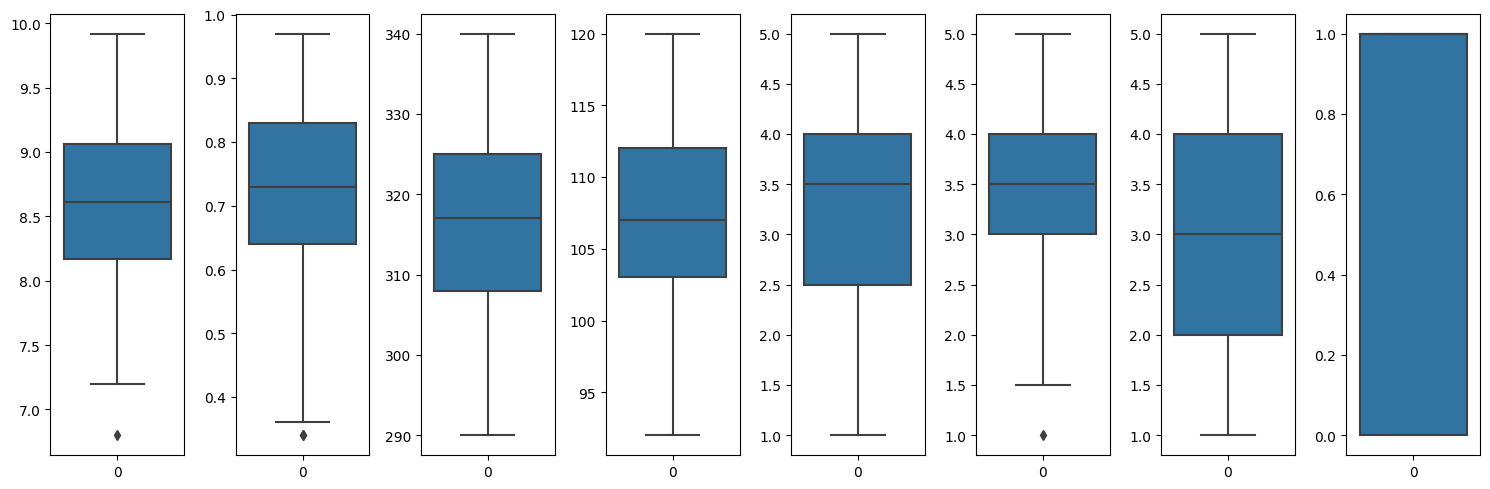

In [16]:
# checking if ther exist an outliers

fig, axs = plt.subplots(nrows=1, ncols=8, figsize = (15,5))

plt1 = sns.boxplot(G_A['CGPA'], ax = axs[0])

plt3 = sns.boxplot(G_A['Chance_of_Admit_'], ax = axs[1])

plt2 = sns.boxplot(G_A['GRE_Score'], ax = axs[2])

plt2 = sns.boxplot(G_A['TOEFL_Score'], ax = axs[3])

plt2 = sns.boxplot(G_A['SOP'], ax = axs[4])

plt2 = sns.boxplot(G_A['LOR_'], ax = axs[5])

plt2 = sns.boxplot(G_A['University_Rating'], ax = axs[6])

plt2 = sns.boxplot(G_A['Research'], ax = axs[7])

plt.tight_layout()

### _Existing outliers are acceptable_

## Data Preprocessing 

In [17]:
# regrouping the data of Chance of Admitition into two clases 
G_A['Chance_of_Admit_'] = G_A['Chance_of_Admit_'].apply(lambda x: 1 if x > 0.5 else 0)

In [18]:
G_A['Chance_of_Admit_'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: Chance_of_Admit_, dtype: int64

* 0 = will not be admitted
* 1 = will be admitted

## Splitting Data 

In [19]:
x = G_A.drop(['Chance_of_Admit_'], axis = 1)
y = G_A['Chance_of_Admit_']

## Data Standardization 

In [20]:
scaler = StandardScaler()

In [21]:
standardized_data = scaler.fit_transform(x)

In [22]:
x = standardized_data
y = y

## Train Test Split 

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.2, random_state = 2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(400, 7) (320, 7) (80, 7)


## Model Training 

In [25]:
SVC = svm.SVC(kernel='linear')
# trainig the SVC classifier
SVC.fit(x_train,y_train)

SVC(kernel='linear')

## Model Evaluation 

In [26]:
# Accuracy score on the trainig data
trainig_data_prediction = SVC.predict(x_train)
trainig_data_accuracy = accuracy_score (trainig_data_prediction,y_train)
print('Accuracy score on the trainig data : ',trainig_data_accuracy)

Accuracy score on the trainig data :  0.9375


In [27]:
# Accuracy score on the testing data
testing_data_prediction = SVC.predict(x_test)
testing_data_accuracy = accuracy_score (testing_data_prediction,y_test)
print('Accuracy score on the testing data : ',testing_data_accuracy)

Accuracy score on the testing data :  0.9625


####   _The difference between training and testing accuracy is relatively small (0.03), and both accuracy values are quite high. This means that the model is  performing well_ 

## Predective System 

In [29]:
input_data = (337,118,4,4.5,4.5,9.65,1)
# changng the input_data to a numpy array
np_array_data = np.asarray(input_data)
# reshape the array
reshaped_input_data = np_array_data.reshape(1,-1)
# standardized the input_data
standardized_data = scaler.transform(reshaped_input_data)
prediction = SVC.predict(standardized_data)
print(prediction)
if (prediction[0]==0):
    print('Graduate Aadmission Failed')
else:
    print('Graduate Admission Accepted')                                             

[1]
Graduate Admission Accepted


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
